<a href="https://colab.research.google.com/github/kowalsp/data_science/blob/main/siec_neuronowa_rozp_cyfr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [5]:
np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.15.0


In [6]:
(x_train,y_train),(x_test,y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [9]:
print(x_train[0].shape)

(28, 28)


In [10]:
x_train=x_train/255.
x_test=x_test/255.

(-0.5, 27.5, 27.5, -0.5)

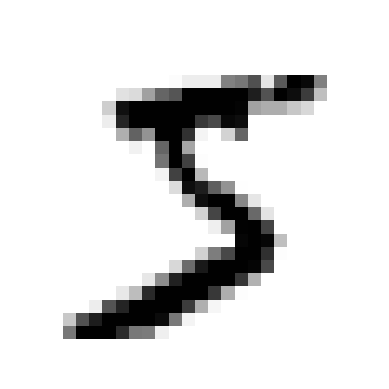

In [11]:
plt.imshow(x_train[0],cmap='gray_r')
plt.axis('off')

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

In [15]:
model.compile(optimizers='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

TypeError: Invalid keyword argument(s) in `compile()`: ({'optimizers'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

In [16]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2891 - accuracy: 0.9158
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1497 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1190 - accuracy: 0.9653
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1039 - accuracy: 0.9694
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0928 - accuracy: 0.9733


In [19]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0930 - accuracy: 0.9748 - 571ms/epoch - 2ms/step


[0.0929863452911377, 0.9747999906539917]

In [20]:
metrics = pd.DataFrame(history.history)

In [21]:
metrics

,loss,accuracy
0,0.289124,0.915850
1,0.149666,0.956633
2,0.119026,0.965300
3,0.103901,0.969400
4,0.092781,0.973300


from matplotlib import pyplot as plt
metrics['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'accuracy'}, axis=1)
              .sort_values('accuracy', ascending=True))
  xs = counted['accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
metrics['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
fig = make_subplots(rows=2,cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'),row=1,col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'),row=2,col=1)
fig.update_layout(width=800, height=400)

In [23]:
model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


array([[0.000000000419, 0.            , 0.000000140716, ..., 0.9999998     , 0.000000000174, 0.000000006998],
       [0.000000000095, 0.000000014826, 0.99999934    , ..., 0.            , 0.000000077811, 0.            ],
       [0.000000276937, 0.99947613    , 0.00004288252 , ..., 0.00013340404 , 0.00015069259 , 0.000000632514],
       ...,
       [0.            , 0.            , 0.000000000002, ..., 0.000000984692, 0.000004198565, 0.000031811698],
       [0.000000004379, 0.000000000001, 0.000000000001, ..., 0.000000000099, 0.000000396882, 0.            ],
       [0.000000000755, 0.            , 0.000000001478, ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [25]:
y_pred = model.predict_classes(x_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'